*Contenuti*
===
- [Info](#Info)
    - [Hello, world!](#Hello,-world!)

In [32]:
import pandas as pd

Abbiamo importato **Pandas**, la libreria Python di manipolazione dati. La sfrutteremo per analizzare dati di consumo elettrico.

Il dataset OPSD
---

<img src='img/OPSD.png' width=250/>

<br>

Il dataset **OPSD_Germany_consumption** riporta il consumo elettrico totale tedesco (in GWh), dal 2006 al 2017. Questi dati fanno parte del progetto OPSD: https://open-power-system-data.org/.



Iniziamo caricando il dataset in formato *dataframe*, la struttura dati base di Pandas. L'unico argomento obbligatorio della funzione *read_csv* è il path del file .csv che vogliamo caricare. Le funzioni *head* e *tail* mostrano rispettivamente i primi e ultimi record (5 di default) del dataframe.

In [33]:
df = pd.read_csv('../data/OPSD_Germany_consumption.csv')
df.head()

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


In [34]:
df.tail()

,Date,Consumption
4378,2017-12-27,1263.94091
4379,2017-12-28,1299.86398
4380,2017-12-29,1295.08753
4381,2017-12-30,1215.44897
4382,2017-12-31,1107.11488


In [35]:
df.shape

(4383, 2)

Pandas eredita la funzione *shape* da NumPy. Il dataframe contiene 4383 record: per ogni riga, oltre all'informazione di consumo, è disponibile la data a cui essa fa riferimento.

Notiamo che Pandas, all'atto del caricamento, dota il dataframe di una struttura di indici. Attraverso la sintassi

        df.loc[position]
        
è possibile accedere all'elemento che si trova all'indice *position*.

In [36]:
df.loc[3]

Date           2006-01-04
Consumption       1457.22
Name: 3, dtype: object

Siamo abituati ad associare le colonne di un dataset alle *feature*. Consideriamo la colonna 'Date': è una colonna speciale? Che ruolo può avere nel machine learning? 

Diamo un'occhiata al suo contenuto.

In [37]:
df['Date'].dtype

dtype('O')

In Pandas il tipo 'O' sta per *Object*: in generale, una stringa.

In [38]:
df['Date'].loc[0]

'2006-01-01'

Notiamo quindi che Pandas ha caricato i record di questa colonna come semplici stringhe.

La funzione *to_datatime* trasforma una stringa in un oggetto dotato di logica temporale.

In [39]:
pd.to_datetime('10-02-09')

Timestamp('2009-10-02 00:00:00')

La funzione ha provato a inferire autonomamente il formato della data: 2 ottobre 2009. Attraverso gli argomenti opzionali è possibile guidare la trasformazione.

In [40]:
pd.to_datetime('10-02-09', yearfirst=True)

Timestamp('2010-02-09 00:00:00')

In [41]:
pd.to_datetime('10-02-09', dayfirst=True)

Timestamp('2009-02-10 00:00:00')

La funzione gestisce formati diversi. 

In [42]:
pd.to_datetime('Jan 3 2019')

Timestamp('2019-01-03 00:00:00')

Oltre ad una singola stringa possiamo convertire liste di stringhe; ad esempio, possiamo trasformare l'intera colonna Date.

In [43]:
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


A prima vista non è cambiato niente. Controlliamo meglio: di che tipo è la colonna trasformata?

In [44]:
df.dtypes

Date           datetime64[ns]
Consumption           float64
dtype: object

Perché il tipo ha questo nome? Python considera gli oggetti temporali come interi a 64 bit, in modo tale da poter gestire la precisione fino al nanosecondo (ns).

Siamo interessati ad analizzare i consumi *nel tempo*. La colonna Date può essere usata come indice.

In [45]:
df.set_index('Date').head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [46]:
df.head()

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


Attenzione: quasi tutte le funzioni Pandas restituiscono una copia dell'oggetto che costruiscono. Perché le modifiche abbiano effetto occorre sovrascrivere il dataframe di partenza (oppure assegnare il risultato ad un nuovo dataframe).

In [47]:
df = df.set_index('Date')

df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


Adesso df è correttamente indicizzato dalla colonna Date. Guardiamo come è fatto questo nuovo indice.

In [48]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

*DatetimeIndex* è un indice particolare di Pandas, con delle proprietà specifiche.

In [49]:
df.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [50]:
df.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=4383)

Ricordiamoci in generale che l'indice, anche se speciale, è comunque una colonna del dataframe: ad ogni suo valore corrisponde uno e un solo record.

Prima di esplorare l'indicizzazione temporale facciamo un passo indietro. Attraverso la funzione read_csv è possibile caricare il dataframe gestendo direttamente l'indicizzazione temporale.

Ricordiamoci che è sempre possibile accedere alla documentazione di una funzione attraverso la sequenza

    Shift Tab (Tab Tab)
    
eseguita col cursore posizionato accanto al nome della funzione. Tra gli argomenti opzionali di read_csv troviamo:

- parse_dates
- index_col

che automatizzano quanto visto in precedenza.

In [51]:
df = pd.read_csv('../data/OPSD_Germany_consumption.csv',
                 parse_dates=True,
                 index_col='Date')
df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 1 columns):
Consumption    4383 non-null float64
dtypes: float64(1)
memory usage: 68.5 KB


**Recap**: abbiamo caricato un dataset, imponendo la colonna Data come indice temporale.

Adesso che ai record del datataframe è associato un riferimento temporale, possiamo accedervi in modo comodo. Supponiamo di voler sapere il consumo elettrico di Natale 2015.

In [66]:
df.loc['2015-12-24']

Consumption    1121.944
Wind            450.484
Solar            36.870
Name: 2015-12-24 00:00:00, dtype: float64

Resta valido l'automatismo nel riconoscimento dei vari formati di data.

In [54]:
df.loc['Dec 24 2015']

Consumption    1121.944
Name: 2015-12-24 00:00:00, dtype: float64

Vogliamo confrontare questo dato con la sua media mensile. Un modo per estrarre il mese di dicembre 2015 è attraverso lo *string indexing*, simile all'indicizzazione NumPy. Attenzione: entrambi gli estremi dell'indicizzazione sono inclusi nel risultato.

In [67]:
df['2015-12-1':'2015-12-31']

,Consumption,Wind,Solar
Date,,,
2015-12-01,1588.021,402.695,14.229
2015-12-02,1585.308,344.001,11.218
2015-12-03,1577.457,279.523,32.060
2015-12-04,1570.318,509.941,18.361
2015-12-05,1337.095,584.727,37.127
2015-12-06,1232.073,589.627,39.065
2015-12-07,1536.251,115.882,37.847
2015-12-08,1572.740,216.441,42.705
2015-12-09,1586.393,279.995,21.606


Una tecnica alternativa è il *partial-string indexing*, disponibile con l'indicizzazione temporale. Specificando mese e anno, estraiamo i soli record di dicembre 2015.

In [69]:
df['2015-12']

,Consumption,Wind,Solar
Date,,,
2015-12-01,1588.021,402.695,14.229
2015-12-02,1585.308,344.001,11.218
2015-12-03,1577.457,279.523,32.060
2015-12-04,1570.318,509.941,18.361
2015-12-05,1337.095,584.727,37.127
2015-12-06,1232.073,589.627,39.065
2015-12-07,1536.251,115.882,37.847
2015-12-08,1572.740,216.441,42.705
2015-12-09,1586.393,279.995,21.606


Ed ecco il consumo medio di dicembre 2015.

In [72]:
df['2015'].mean()

Consumption    1384.286474
Wind            212.243819
Solar            95.635995
dtype: float64

Esercizio 1.1
---

Il dataset **OPSD_Germany_all** contiene, oltre al consumo, la produzioni di energia eolica e solare.

- Caricare il dataset in formato dataframe, usando la colonna Data come indice temporale;
- i dati sul consumo di energia rinnovabile sono disponibili dal 1 gennaio 2012; selezionare, dal dataframe, solo i record posteriori a tale data (compresa);
- costruire la colonna *Renewable* come somma delle produzioni eolica e solare;
- calcolare il rapporto tra
    - a) la produzione rinnovabile totale di settembre 2014 e
    - b) il consumo totale dello stesso mese;
- sfruttando le proprietà dell'indice Data (**hint**: *weekday_name*), costruire la colonna 'Weekday' contenente, per ogni record, il giorno della settimana (Monday, Tuesday, ...);
- costruire la Series *df_sunday_wind* contenente la produzione eolica delle sole domeniche;
- calcolare la produzione eolica media domenicale tra gennaio e marzo 2017 (inclusi).

---

Serie temporali: *analysis* vs *forecast*
---

Come interviene il concetto di tempo nel machine learning classico? Un modello, una volta addestrato, viene testato sui dati *futuri* via via disponibili. In generale, però, durante l'apprendimento i dati del training set vengono trattati tutti allo stesso modo; non sono cioè ordinati temporalmente.

<h3><center><i>Una serie temporale è una sequenza di dati osservati sequenzialmente.</i></center></h3>

Rispetto ad un dataset classico di apprendimento aggiunge dipendenza temporale tra i record.

Si parla di **analysis** quando siamo interessati a capire e descrivere una serie temporale di dati passati. Questa analisi non è necessariamente mirata alla predizione del futuro. Quando, viceversa, siamo interessati al futuro di una serie temporale (e sfruttiamo il suo passato per fare previsioni), stiamo facendo **forecast**.

Serie temporali univariate e multivariate
---

Una serie temporale si dice **univariata** se consiste di una sola variabile osservata sequenzialmente. Si pensi, ad esempio, alle vendite di un certo prodotto o alla temperatura minima giornaliera. Il dataset visto all'inizio della lezione è un altro esempio di serie univariata.

<img src='img/uni.png' width=500/>

In una serie **multivariata** più quantità variano nel tempo. Si pensi ad un sistema fisico in cui è nota, in ogni istante, la velocità lungo i tre assi coordinati $x$, $y$ e $z$. Il dataset **OPSD_Germany_all** è una serie multivariata.

<img src='img/multi.png' width=500/>

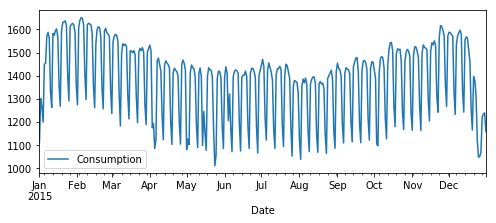

In [87]:
import seaborn as sns

df = pd.read_csv('../data/OPSD_Germany_consumption.csv',
                 parse_dates=True,
                 index_col='Date')

df['2015'].plot(figsize=(8,3))

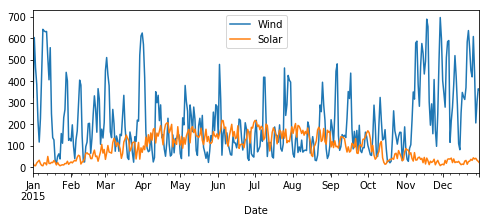

In [83]:
df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df['2015'][['Wind', 'Solar']].plot(figsize=(8,3))